In [1]:
import os
import sys

path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [9]:
# TODO: change all the paths to the correct ones
INPUT_DIR = '/home/ahassayoune/swpa_test/input'
REF_FILENAME = 'G0-1-300123.cdf'
MOD_TIME = 1.25

In [3]:
print(f"Reference file: {REF_FILENAME}")
target_files = [file for file in os.listdir(INPUT_DIR) if file.endswith('.cdf') and file != REF_FILENAME]
print(f"Target chromatograms: {target_files}")

Reference file: G0-1-300123.cdf
Target chromatograms: ['G0-1-250123.cdf']


In [ ]:
from swpa_peak_alignment import swpa_peak_alignment

matches = swpa_peak_alignment(INPUT_DIR, REF_FILENAME, mod_time=MOD_TIME)

print("\nNumber of matches found: ", len(matches))
matches.head(10)

chromato read 4.130337238311768 s
--- 38.74840688705444 seconds --- to compute full spectra centroid
full spectra computed 39.8590407371521 s
baseline corrected
Converted reference chromatogram to CSV
chromato read 6.454274892807007 s
--- 73.24580001831055 seconds --- to compute full spectra centroid
full spectra computed 74.36317253112793 s
baseline corrected
Converted 1/1 chromatograms to CSV

Scheduling SWPA script with the following arguments:
	- Output directory: /tmp/tmp_nznwl47/2025-01-18_14-44-54_out
	- Reference: /tmp/tmp_nznwl47/G0-1-300123.csv
	- Targets: ['/tmp/tmp_nznwl47/G0-1-250123.csv']

[1] "Received Arguments:"
[1] "   - Output directory: /tmp/tmp_nznwl47/2025-01-18_14-44-54_out"
[1] "   - Reference: /tmp/tmp_nznwl47/G0-1-300123.csv"
[1] "   - Targets:  /tmp/tmp_nznwl47/G0-1-250123.csv"
[1] "Target Path:"
[1] "/tmp/tmp_nznwl47/G0-1-250123.csv"

Number of matches found:  36


,filename,tt1,tt2,tp1,tp2,rt1,rt2,rp1,rp2,sim,dist,tid,rid,combined_sim_dist
30,G0-1-250123,42.447975,0.763423,1631,91,42.447975,0.771812,1631,92,0.999704,0.991681,113,52,1.990622
29,G0-1-250123,42.843445,0.385906,1650,46,42.843445,0.385906,1650,46,0.999604,1.000000,112,51,1.989600
27,G0-1-250123,39.658871,0.201342,1497,24,39.658871,0.192953,1497,23,0.999582,0.991681,106,49,1.977926
13,G0-1-250123,13.849252,0.947987,257,113,13.849252,0.939597,257,112,0.999577,0.991681,41,30,1.977431
33,G0-1-250123,48.546539,1.241611,1924,148,48.546539,1.250000,1924,149,0.999475,0.991681,120,55,1.966771
31,G0-1-250123,45.799063,0.687919,1792,82,45.799063,0.729866,1792,87,0.999502,0.959742,115,53,1.933511
28,G0-1-250123,38.222691,0.931208,1428,111,38.201877,0.931208,1427,111,0.999176,0.979610,107,50,1.921866
32,G0-1-250123,48.567353,0.000000,1925,0,48.567353,0.050336,1925,6,0.999356,0.952077,117,54,1.909664
9,G0-1-250123,13.016683,0.058725,217,7,13.016683,0.058725,217,7,0.998787,1.000000,24,26,1.904280
11,G0-1-250123,12.121672,0.981544,174,117,12.121672,0.973154,174,116,0.998728,0.991681,30,28,1.888692


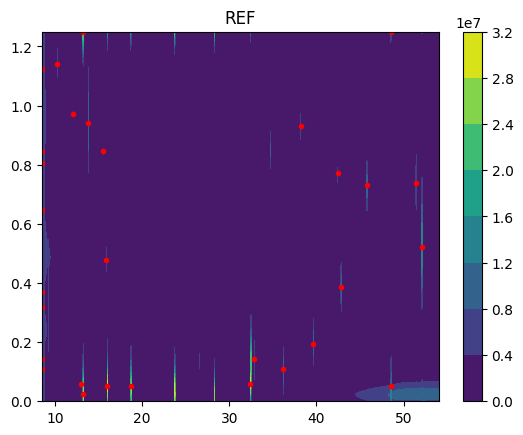

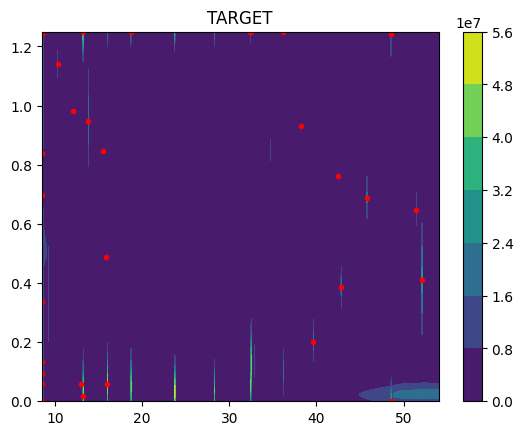

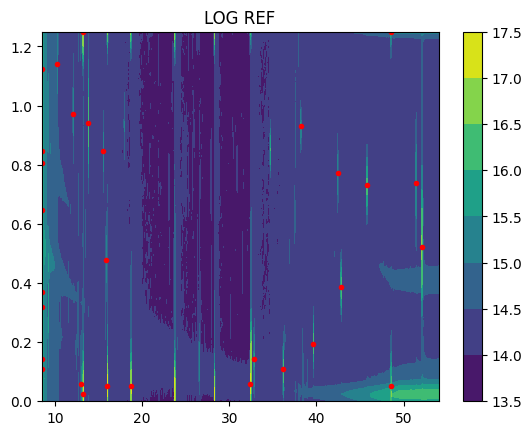

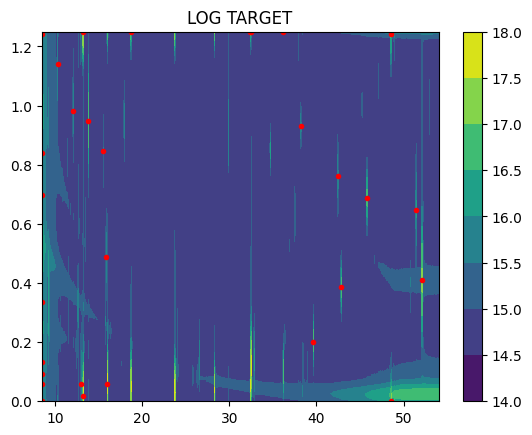

In [8]:
import plot
from read_chroma import read_only_chroma

chromato1, time_rn1= read_only_chroma(os.path.join(INPUT_DIR, REF_FILENAME), mod_time = MOD_TIME)
chromato2, time_rn2= read_only_chroma(os.path.join(INPUT_DIR, target_files[0]), mod_time = MOD_TIME)

coordinates1 = matches[['rt1', 'rt2']].values[:30]
coordinates2 = matches[['tt1', 'tt2']].values[:30]

plot.visualizer((chromato1, time_rn1), title="REF", log_chromato=False, points=coordinates1, mod_time=MOD_TIME)
plot.visualizer((chromato2, time_rn2), title="TARGET", log_chromato=False, points=coordinates2, mod_time=MOD_TIME)
plot.visualizer((chromato1, time_rn1), title="LOG REF", points=coordinates1, mod_time=MOD_TIME) # log_chromato=True
plot.visualizer((chromato2, time_rn2), title="LOG TARGET", points=coordinates2, mod_time=MOD_TIME) # log_chromato=True